In [1]:
# Training CNN model to predict Mask and No Mask  (Images)
#import libraries
# for accuracy and loss graph
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [2]:
train_path = 'C:/Users/Hp/Desktop/Jupyter_datasets/MASK DETECTION/train'
valid_path = 'C:/Users/Hp/Desktop/Jupyter_datasets/MASK DETECTION/valid'

In [3]:
# for accuracy and loss graph(train set:1559 images;validation data set:2090 images)
def PlotImage(img_arr):
  fig,axes = plt.subplots(1,5,figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(img_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

In [4]:
# this is the augmentation configuration we will use for training
# It will generate more images using below parameters
training_datagen = ImageDataGenerator( rescale=1/255 , rotation_range=40 , width_shift_range=0.2 , height_shift_range=0.2 , shear_range=0.2 , zoom_range=0.2 , horizontal_flip=True , fill_mode='nearest' )
# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data= training_datagen.flow_from_directory(train_path , target_size=(200,200) , batch_size=128 , class_mode='binary' )
#train_data_path==train_path...this is the target directory
#(200,200)
# since we use binary_crossentropy loss, we need binary labels

Found 3649 images belonging to 2 classes.


In [5]:

training_data.class_indices

{'with_mask': 0, 'without_mask': 1}

In [6]:

valid_datagen = ImageDataGenerator( rescale=1/255)

valid_data= training_datagen.flow_from_directory(valid_path , target_size=(200,200) , batch_size=128 , class_mode='binary' )

Found 806 images belonging to 2 classes.


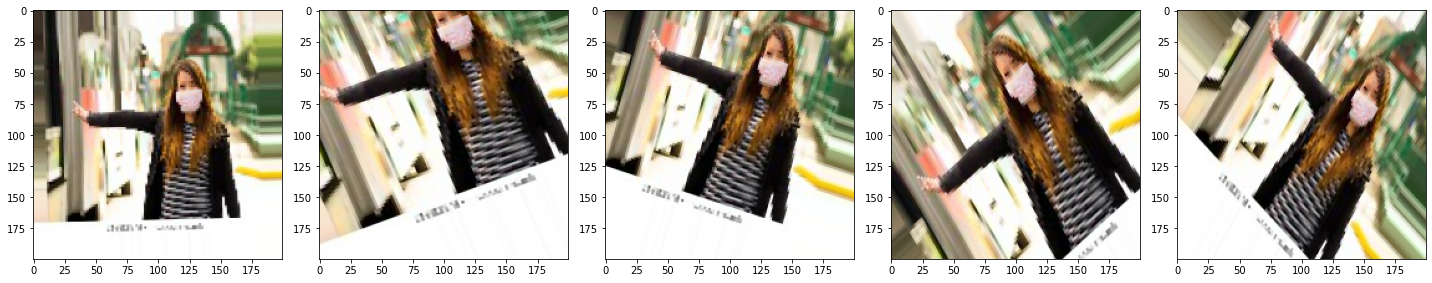

In [7]:


images = [ training_data[0][0][0] for i in range(5) ]
PlotImage(images)

In [8]:
# save best model using vall accuracy
model_save_path = 'face_mask_detection_model.h5'
checkpoint = ModelCheckpoint(model_save_path , monitor='val_accuracy' ,verbose=1 , save_best_only=True , mode='max')
callbacks_list = [checkpoint]

In [12]:
#own cnn architecture

In [9]:
model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[200, 200, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Dropout(0.5),                                                                       
                                    keras.layers.Flatten(), 
                                    keras.layers.Dense(units=128, activation='relu'), 
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=2, activation='softmax') 
])

In [11]:
model.compile(optimizer= 'adam' , loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 128)      0

In [12]:
history = model.fit(training_data ,
                    epochs=50 , 
                    verbose=1, 
                    validation_data= valid_data , callbacks = callbacks_list )

Epoch 1/50
 7/29 [======>.......................] - ETA: 3:14 - loss: 1.0512 - accuracy: 0.5167

D:\ProgramData\Anaconda\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


29/29 [==============================] - ETA: 0s - loss: 0.6775 - accuracy: 0.6744
Epoch 00001: val_accuracy improved from -inf to 0.86600, saving model to face_mask_detection_model.h5
29/29 [==============================] - 300s 10s/step - loss: 0.6775 - accuracy: 0.6744 - val_loss: 0.3563 - val_accuracy: 0.8660
Epoch 2/50
29/29 [==============================] - ETA: 0s - loss: 0.3550 - accuracy: 0.8613
Epoch 00002: val_accuracy improved from 0.86600 to 0.89826, saving model to face_mask_detection_model.h5
29/29 [==============================] - 275s 9s/step - loss: 0.3550 - accuracy: 0.8613 - val_loss: 0.2862 - val_accuracy: 0.8983
Epoch 3/50
29/29 [==============================] - ETA: 0s - loss: 0.3189 - accuracy: 0.8827
Epoch 00003: val_accuracy did not improve from 0.89826
29/29 [==============================] - 277s 10s/step - loss: 0.3189 - accuracy: 0.8827 - val_loss: 0.3527 - val_accuracy: 0.8697
Epoch 4/50
29/29 [==============================] - ETA: 0s - loss: 0.2904 

In [13]:
model.save("face_mask_detection_model.h5")

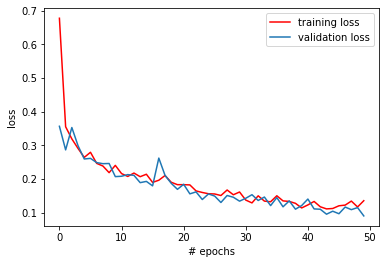

In [14]:
# plot the loss
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

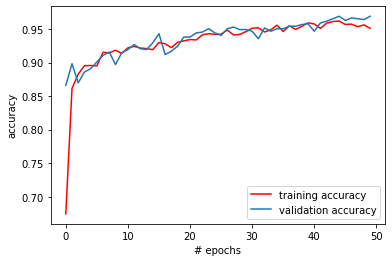

In [15]:
# plot the accuracy
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [17]:
from sklearn.metrics import confusion_matrix
import numpy as np

In [18]:
y_test = model.predict(valid_data)
y_pred = np.argmax(y_pred, axis=1)

conf_mat = confusion_matrix(y_test, y_pred)

NameError: name 'y_pred' is not defined